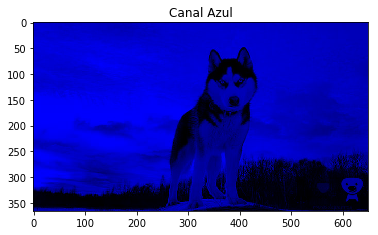

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Leer la imagen
img = cv2.imread('./img/perro.jpg')

# Mostrar solo el canal azul
blue_channel = img.copy()
blue_channel[:, :, 1] = 0  # Eliminar canal verde
blue_channel[:, :, 2] = 0  # Eliminar canal rojo

# Mostrar la imagen con solo el canal azul
plt.imshow(cv2.cvtColor(blue_channel, cv2.COLOR_BGR2RGB))
plt.title('Canal Azul')
plt.show()


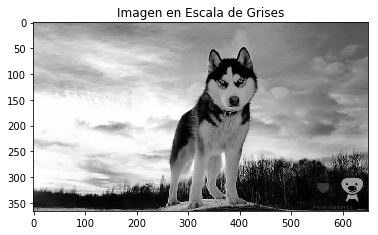

In [22]:
# Convertir la imagen a escala de grises
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mostrar la imagen en escala de grises
plt.imshow(gray_img, cmap='gray')
plt.title('Imagen en Escala de Grises')
plt.show()


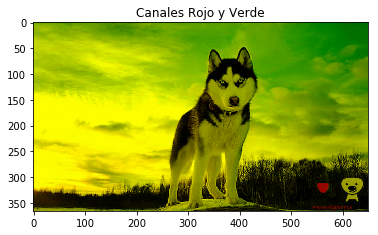

In [23]:
# Crear una imagen con solo los canales rojo y verde
red_green_img = img.copy()
red_green_img[:, :, 0] = 0  # Eliminar canal azul

# Mostrar la imagen con solo los canales rojo y verde
plt.imshow(cv2.cvtColor(red_green_img, cv2.COLOR_BGR2RGB))
plt.title('Canales Rojo y Verde')
plt.show()


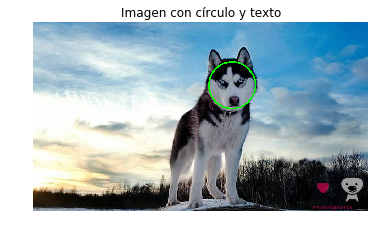

In [27]:
dog_cascade = cv2.CascadeClassifier('./haarcascade_frontalcatface.xml')

# Detectar la cara del perro
faces = dog_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))


for (x, y, w, h) in faces:
    center = (x + w // 2, y + h // 2)
    radius = w // 2
    cv2.circle(img, center, radius, (0, 255, 0), 2)  # Círculo verde
    
# Mostrar la imagen resultante
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Imagen con círculo y texto')
plt.show()

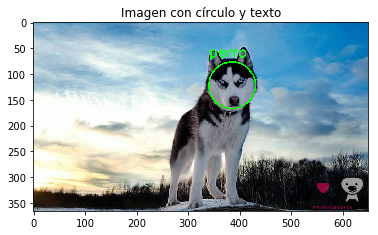

In [29]:

for (x, y, w, h) in faces:
    center = (x + w // 2, y + h // 2)
    radius = w // 2
    cv2.putText(img, 'perro', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

# Mostrar la imagen resultante
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('on')
plt.title('Imagen con círculo y texto')
plt.show()

In [30]:
# Guardar la imagen con los círculos y el texto
output_path = './image_with_circles.png'
cv2.imwrite(output_path, img)


True

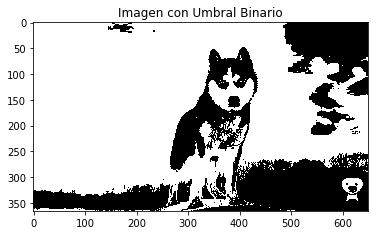

In [7]:
# Aplicar umbral binario
_, binary_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)

# Mostrar la imagen con umbral binario
plt.imshow(binary_img, cmap='gray')
plt.title('Imagen con Umbral Binario')
plt.show()


In [31]:
import cv2
import numpy as np

# Crear una imagen en blanco
drawing_img = np.zeros((512, 512, 3), np.uint8)
drawing = False  # true if mouse is pressed
mode = True  # if True, draw rectangle. Press 'm' to toggle to curve
ix, iy = -1, -1

# Mouse callback function
def draw_circle(event, x, y, flags, param):
    global ix, iy, drawing, mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            if mode:
                cv2.rectangle(drawing_img, (ix, iy), (x, y), (0, 255, 0), -1)
            else:
                cv2.circle(drawing_img, (x, y), 5, (0, 0, 255), -1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode:
            cv2.rectangle(drawing_img, (ix, iy), (x, y), (0, 255, 0), -1)
        else:
            cv2.circle(drawing_img, (x, y), 5, (0, 0, 255), -1)

cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)

while True:
    cv2.imshow('image', drawing_img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break

cv2.destroyAllWindows()

# Guardar la imagen dibujada
cv2.imwrite('drawn_image.jpg', drawing_img)


True